# project2의 3팀 코드입니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle

def open_pickle(path: str):
    with open(path, 'rb') as f:
        target = pickle.load(f)
    return target

In [3]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

## 1. train, valid 데이터 셋 불러오기

In [4]:
train_path = r"./train.csv"
valid_path = r"./valid.csv"

train_df = pd.read_csv(train_path)
valid_df = pd.read_csv(valid_path)


#### 1.2 train, valid concat 시도 - IP Voting에서의 그룹핑 할 때 문제 발생

In [5]:
# tmp_df = pd.concat([train_df, valid_df], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
# train_df = tmp_df.iloc[:len(train_df)].reset_index(drop=True)
# valid_df = tmp_df.iloc[len(train_df):].reset_index(drop=True)

In [6]:
train_df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flags,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,Packet Length Std,Packet Length Variance,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,21.122.91.166,13850,30.239.23.122,53,TCP,......S.,03:52:00,3119967,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1559983.5,7.922615e+05,2120197.0,999770.0,3119967.0,1559983.5,792261.529524,2120197.0,999770.0,0.0,0.0,0.0,0.0,0.0,120,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
1,21.122.91.166,43842,30.239.23.122,53,TCP,......S.,03:37:20,2991830,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1495915.0,7.151791e+05,2001623.0,990207.0,2991830.0,1495915.0,715179.112201,2001623.0,990207.0,0.0,0.0,0.0,0.0,0.0,120,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
2,21.122.91.165,25918,30.239.23.122,53,TCP,......S.,03:10:28,3004658,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1502329.0,7.150391e+05,2007938.0,996720.0,3004658.0,1502329.0,715039.105058,2007938.0,996720.0,0.0,0.0,0.0,0.0,0.0,120,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
3,173.123.45.117,4445,30.239.23.122,53,TCP,...A...F,00:42:24,4402645,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2201322.5,3.110262e+06,4400610.0,2035.0,4400610.0,4400610.0,0.000000,4400610.0,4400610.0,0.0,0.0,0.0,0.0,0.0,40,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
4,21.122.91.165,28467,30.239.23.122,53,TCP,......S.,02:45:28,3001784,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500892.0,7.059415e+05,2000068.0,1001716.0,3001784.0,1500892.0,705941.469211,2000068.0,1001716.0,0.0,0.0,0.0,0.0,0.0,120,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP


In [7]:
valid_df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flags,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,Packet Length Std,Packet Length Variance,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,173.123.45.54,61650,30.239.23.122,53,TCP,...A...F,00:47:49,4454322,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2227161.0,3.146219e+06,4451874.0,2448.0,4451874.0,4451874.0,0.000000,4451874.0,4451874.0,0.0,0.0,0.0,0.0,0.0,40,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
1,21.122.91.165,35929,30.239.23.122,53,TCP,......S.,04:05:32,2988477,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1494238.5,7.149578e+05,1999790.0,988687.0,2988477.0,1494238.5,714957.787778,1999790.0,988687.0,0.0,0.0,0.0,0.0,0.0,120,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
2,173.123.45.54,64652,30.239.23.122,53,TCP,...A...F,02:07:05,5092931,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2546465.5,3.597473e+06,5090263.0,2668.0,5090263.0,5090263.0,0.000000,5090263.0,5090263.0,0.0,0.0,0.0,0.0,0.0,40,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024,4,0,20,0.0,0.0,0.0,0.0,5090263.0,0.0,5090263.0,5090263.0,Benign_IP
3,21.122.91.166,42876,30.239.23.122,53,TCP,......S.,03:19:22,2993254,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1496627.0,7.145413e+05,2001884.0,991370.0,2993254.0,1496627.0,714541.301884,2001884.0,991370.0,0.0,0.0,0.0,0.0,0.0,120,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29200,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP
4,173.123.45.54,62593,30.239.23.122,53,TCP,...A...F,00:53:13,4534770,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2267385.0,3.203341e+06,4532489.0,2281.0,4532489.0,4532489.0,0.000000,4532489.0,4532489.0,0.0,0.0,0.0,0.0,0.0,40,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1024,4,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign_IP


## 2. feature 추가하기

도메인 지식을 활용하여 feature를 자유롭게 추가하시면 됩니다.

In [8]:
import ipaddress
from sklearn.preprocessing import LabelEncoder

train_flags =train_df[['Flags']]
valid_flags =valid_df[['Flags']]

train_src_ip = train_df[['Src IP']]
train_dst_ip = train_df[['Dst IP']]

valid_src_ip = valid_df[['Src IP']]
valid_dst_ip = valid_df[['Dst IP']]


def map_ip_to_class(ip):
    first_octet = int(ip.split('.')[0])
    if 1<= first_octet <= 126:
        return 1
    elif 128 <= first_octet <= 191:
        return 2
    elif 192 <= first_octet <= 223:
        return 3
    elif 224 <= first_octet <= 239:
        return 4
    else:
        return 5
    
train_src_ip['Src_Class'] = train_src_ip['Src IP'].apply(map_ip_to_class)
train_dst_ip['Dst_Class'] = train_dst_ip['Dst IP'].apply(map_ip_to_class)

valid_src_ip['Src_Class'] = valid_src_ip['Src IP'].apply(map_ip_to_class)
valid_dst_ip['Dst_Class'] = valid_dst_ip['Dst IP'].apply(map_ip_to_class)


def convert_to_int(ip):
	return int(ipaddress.IPv4Address(ip))

train_src_ip['Int'] = train_src_ip['Src IP'].apply(convert_to_int)
train_dst_ip['Int'] = train_dst_ip['Dst IP'].apply(convert_to_int)

valid_src_ip['Int'] = valid_src_ip['Src IP'].apply(convert_to_int)
valid_dst_ip['Int'] = valid_dst_ip['Dst IP'].apply(convert_to_int)

flag_mapping = {
    '.' : 0,  # 예시에 따라 .은 0에 매핑
    'A' : 1,  # 예시에 따라 A는 1에 매핑
    'F' : 2,
    'S' : 3,
    'R' : 4,
    'P' : 5,
    'C' : 6,
    'E' : 7,
    'U' : 8,
    # 다른 플래그에 대한 매핑도 필요한 경우 추가 가능
}

protocol_mapping = {
    '0' : 0,
    'TCP' : 1,
    'UDP' : -1
}

def encode_flags(flags_str):
	encoded = [flag_mapping[char] for char in flags_str if char in flag_mapping]
	res = ''
	for i in encoded:
		res += str(i)
	return res


	
# train_flags['Encoded_Flags'] = train_flags['Flags'].apply(encode_flags)
encoder = LabelEncoder()
encoder.fit(train_flags)
train_flags['Encoded_Flags'] = encoder.transform(train_flags)
# label encoding protocol
train_protocol = train_df[['Protocol']]
encoder.fit(train_protocol)
train_protocol['Encoded_protocol'] = encoder.transform(train_protocol)
# train_protocol = train_df[['Protocol']].apply(lambda x: x.map(protocol_mapping))




# valid_flags['Encoded_flags'] =valid_df['Flags'].apply(encode_flags)
# valid_protocol = valid_df[['Protocol']].apply(lambda x: x.map(protocol_mapping))
encoder.fit(valid_flags)
valid_flags['Encoded_Flags'] = encoder.transform(valid_flags)

valid_protocol = valid_df[['Protocol']]
encoder.fit(valid_protocol)
valid_protocol['Encoded_protocol'] = encoder.transform(valid_protocol)

#train_protocol.head()

train_src_ip.rename(columns={'Int':'Src_CIDR'}, inplace=True)
train_dst_ip.rename(columns={'Int':'Dst_CIDR'}, inplace=True)
valid_src_ip.rename(columns={'Int':'Src_CIDR'}, inplace=True)
valid_dst_ip.rename(columns={'Int':'Dst_CIDR'}, inplace=True)
train_src_ip.head()

/var/folders/7v/jspts5lx38l1dn20zwm8kz3m0000gn/T/ipykernel_47892/2857994253.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_src_ip['Src_Class'] = train_src_ip['Src IP'].apply(map_ip_to_class)
/var/folders/7v/jspts5lx38l1dn20zwm8kz3m0000gn/T/ipykernel_47892/2857994253.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dst_ip['Dst_Class'] = train_dst_ip['Dst IP'].apply(map_ip_to_class)
/var/folders/7v/jspts5lx38l1dn20zwm8kz3m0000gn/T/ipykernel_47892/2857994253.py:30: SettingWithCopyWarning:

,Src IP,Src_Class,Src_CIDR
0,21.122.91.166,1,360340390
1,21.122.91.166,1,360340390
2,21.122.91.165,1,360340389
3,173.123.45.117,2,2910530933
4,21.122.91.165,1,360340389


In [9]:
valid_protocol.head()

,Protocol,Encoded_protocol
0,TCP,1
1,TCP,1
2,TCP,1
3,TCP,1
4,TCP,1


In [10]:
valid_flags.head(100)

,Flags,Encoded_Flags
0,...A...F,5
1,......S.,1
2,...A...F,5
3,......S.,1
4,...A...F,5
5,........,0
6,......S.,1
7,......S.,1
8,......S.,1
9,...A...F,5


In [11]:
#train_expt = train_df[['Idle Mean','Flow IAT Mean','Src Port','Dst Port','Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
#			'Total Length of Fwd Packet', 'Total Length of Bwd Packet','Fwd Header Length', 'Bwd Header Length']]
train_expt = train_df[['Src Port','Flow IAT Mean','Flow IAT Max', 'Fwd Header Length', 'Dst Port','FWD Init Win Bytes','Fwd IAT Min','Flow IAT Min','Fwd Seg Size Min','Flow IAT Std','Flow Duration','Fwd IAT Mean', 'Total Fwd Packet', 'Total Bwd packets', 'Fwd IAT Max', 'Fwd IAT Std', 'Fwd IAT Total', 'Total Length of Bwd Packet','Bwd Header Length','Bwd Init Win Bytes','Fwd Act Data Pkts','Fwd Packet Length Max','Total Length of Fwd Packet','Packet Length Variance','Fwd Segment Size Avg','Bwd IAT Total','Packet Length Min','Bwd Segment Size Avg','Fwd Packet Length Min','Average Packet Size','Packet Length Max','Active Min','Bwd Packet Length Max','Packet Length Std','Idle Std','Active Max','Active Mean','Bwd IAT Mean','Bwd Packet Length Min','Idle Max','Idle Min','Idle Mean','Bwd IAT Min','Bwd IAT Max']]

train_expt = pd.concat([train_expt, train_flags['Encoded_Flags'],train_protocol['Encoded_protocol'],train_src_ip[['Src_Class','Src_CIDR']],train_dst_ip[['Dst_Class','Dst_CIDR']]], axis=1)

train_list = train_expt.values.tolist()

#valid_expt = valid_df[['Idle Mean','Flow IAT Mean','Src Port','Dst Port','Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
			#'Total Length of Fwd Packet', 'Total Length of Bwd Packet','Fwd Header Length', 'Bwd Header Length']]
valid_expt = valid_df[['Src Port','Flow IAT Mean','Flow IAT Max', 'Fwd Header Length', 'Dst Port','FWD Init Win Bytes','Fwd IAT Min','Flow IAT Min','Fwd Seg Size Min','Flow IAT Std','Flow Duration','Fwd IAT Mean', 'Total Fwd Packet', 'Total Bwd packets', 'Fwd IAT Max', 'Fwd IAT Std', 'Fwd IAT Total', 'Total Length of Bwd Packet','Bwd Header Length','Bwd Init Win Bytes','Fwd Act Data Pkts','Fwd Packet Length Max','Total Length of Fwd Packet','Packet Length Variance','Fwd Segment Size Avg','Bwd IAT Total','Packet Length Min','Bwd Segment Size Avg','Fwd Packet Length Min','Average Packet Size','Packet Length Max','Active Min','Bwd Packet Length Max','Packet Length Std','Idle Std','Active Max','Active Mean','Bwd IAT Mean','Bwd Packet Length Min','Idle Max','Idle Min','Idle Mean','Bwd IAT Min','Bwd IAT Max']]

valid_expt = pd.concat([valid_expt, valid_flags['Encoded_Flags'],valid_protocol['Encoded_protocol'],valid_protocol,valid_src_ip[['Src_Class','Src_CIDR']],valid_dst_ip[['Dst_Class','Dst_CIDR']]], axis=1)
valid_list = valid_expt.values.tolist()


In [12]:
print(len(train_expt.columns))

50


In [169]:
train_expt.head()

,Src Port,Flow IAT Mean,Flow IAT Max,Fwd Header Length,Dst Port,FWD Init Win Bytes,Fwd IAT Min,Flow IAT Min,Fwd Seg Size Min,Flow IAT Std,Flow Duration,Fwd IAT Mean,Total Fwd Packet,Total Bwd packets,Fwd IAT Max,Fwd IAT Std,Fwd IAT Total,Total Length of Bwd Packet,Bwd Header Length,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Packet Length Max,Total Length of Fwd Packet,Packet Length Variance,Fwd Segment Size Avg,Bwd IAT Total,Packet Length Min,Bwd Segment Size Avg,Fwd Packet Length Min,Average Packet Size,Packet Length Max,Active Min,Bwd Packet Length Max,Packet Length Std,Idle Std,Active Max,Active Mean,Bwd IAT Mean,Bwd Packet Length Min,Idle Max,Idle Min,Idle Mean,Bwd IAT Min,Bwd IAT Max,Encoded_Flags,Encoded_protocol,Src_Class,Src_CIDR,Dst_Class,Dst_CIDR
0,13850,1559983.5,2120197.0,120,53,29200,999770.0,999770.0,40,7.922615e+05,3119967,1559983.5,3,0,2120197.0,792261.529524,3119967.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,360340390,1,518985594
1,43842,1495915.0,2001623.0,120,53,29200,990207.0,990207.0,40,7.151791e+05,2991830,1495915.0,3,0,2001623.0,715179.112201,2991830.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,360340390,1,518985594
2,25918,1502329.0,2007938.0,120,53,29200,996720.0,996720.0,40,7.150391e+05,3004658,1502329.0,3,0,2007938.0,715039.105058,3004658.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,360340389,1,518985594
3,4445,2201322.5,4400610.0,40,53,511,4400610.0,2035.0,20,3.110262e+06,4402645,4400610.0,2,1,4400610.0,0.000000,4400610.0,0.0,20,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,2,2910530933,1,518985594
4,28467,1500892.0,2000068.0,120,53,29200,1001716.0,1001716.0,40,7.059415e+05,3001784,1500892.0,3,0,2000068.0,705941.469211,3001784.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,360340389,1,518985594


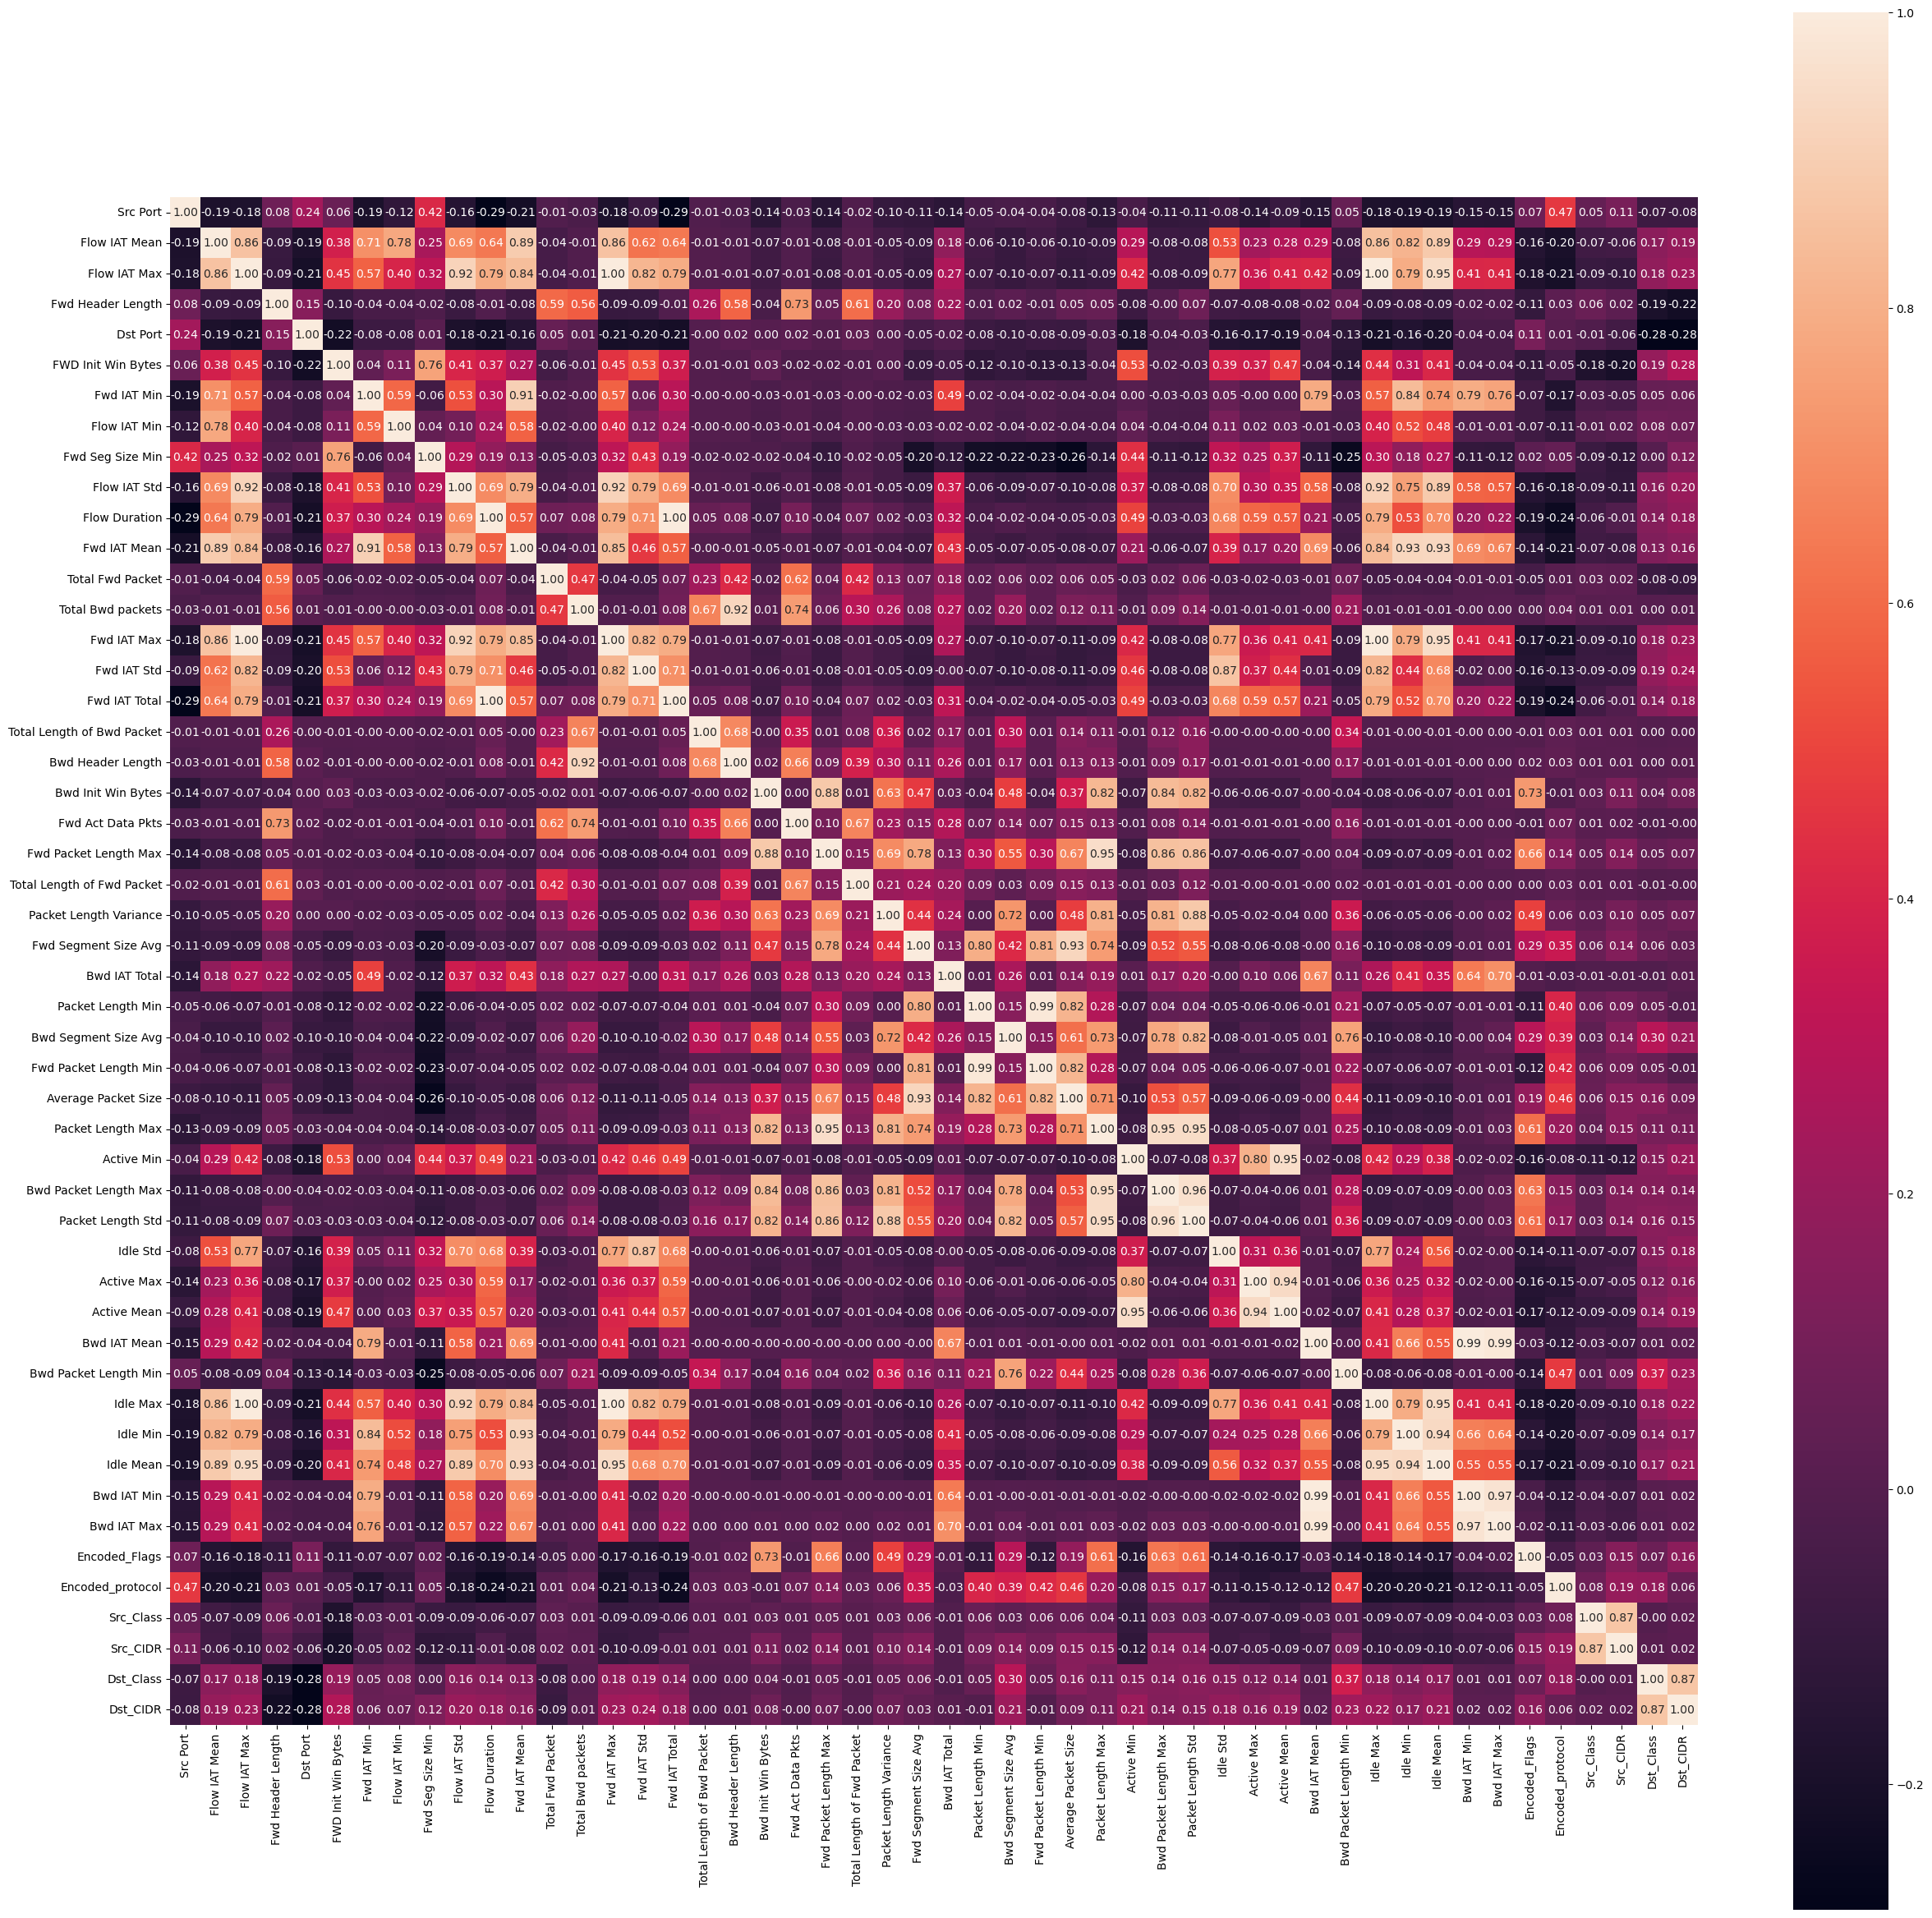

In [170]:

plt.figure(figsize=(30,30))
sns.heatmap(train_expt.corr(), annot=True, fmt='.2f', square=True)
plt.show()


<AxesSubplot:>

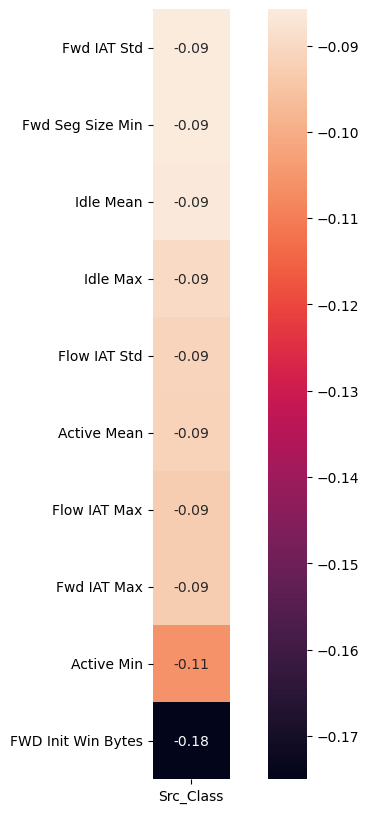

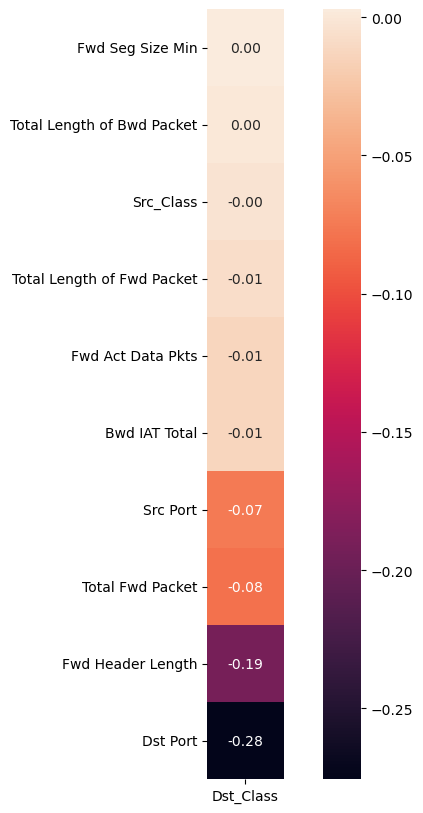

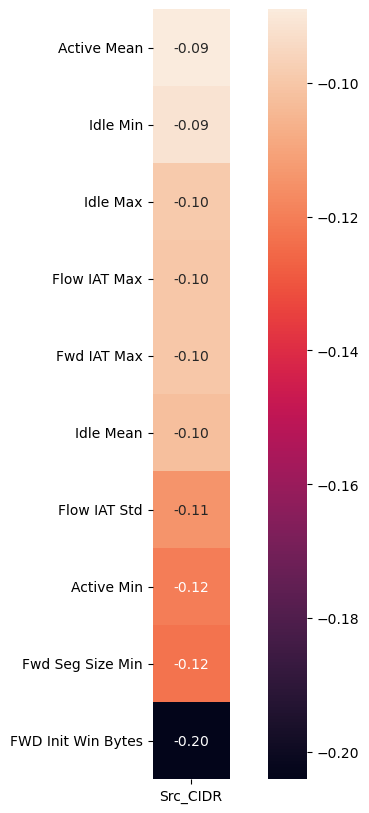

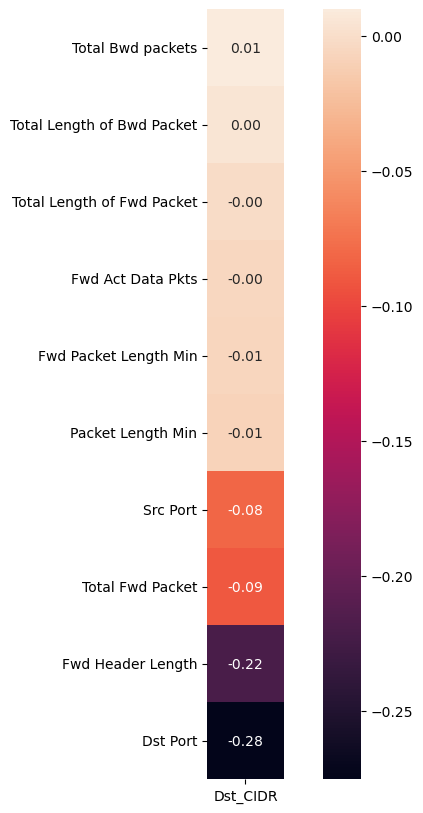

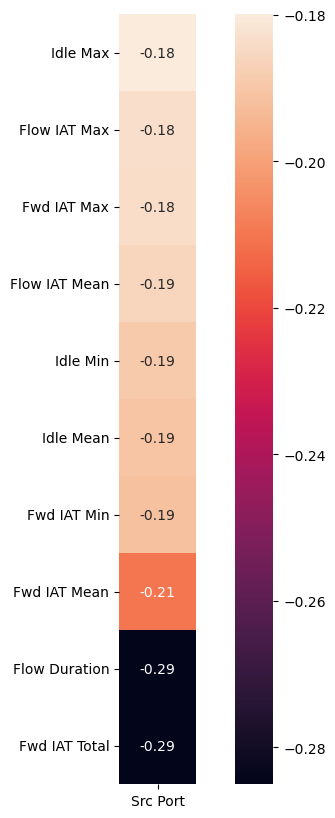

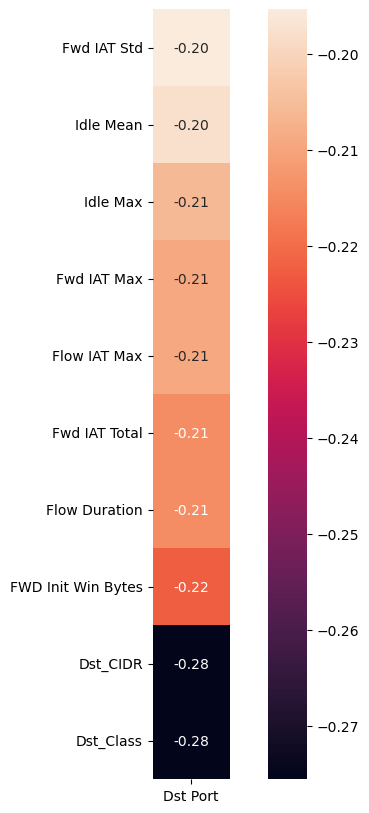

In [171]:
# each features' correlation rank by Src_Class, last 10 type of 1-Dimension list
plt.figure(figsize=(10,10))
sns.heatmap(train_expt.corr()[['Src_Class']].sort_values(by=['Src_Class'], ascending=False)[-10:], annot=True, fmt='.2f', square=True)
# each features' correlation rank by Dst_Class
plt.figure(figsize=(10,10))
sns.heatmap(train_expt.corr()[['Dst_Class']].sort_values(by=['Dst_Class'], ascending=False)[-10:], annot=True, fmt='.2f', square=True)
# each features' correlation rank by Src_CIDR
plt.figure(figsize=(10,10))
sns.heatmap(train_expt.corr()[['Src_CIDR']].sort_values(by=['Src_CIDR'], ascending=False)[-10:], annot=True, fmt='.2f', square=True)
# each features' correlation rank by Dst_CIDR
plt.figure(figsize=(10,10))
sns.heatmap(train_expt.corr()[['Dst_CIDR']].sort_values(by=['Dst_CIDR'], ascending=False)[-10:], annot=True, fmt='.2f', square=True)
# each features' correlation rank by Src Port
plt.figure(figsize=(10,10))
sns.heatmap(train_expt.corr()[['Src Port']].sort_values(by=['Src Port'], ascending=False)[-10:], annot=True, fmt='.2f', square=True)
# each features' correlation rank by Dst Port
plt.figure(figsize=(10,10))
sns.heatmap(train_expt.corr()[['Dst Port']].sort_values(by=['Dst Port'], ascending=False)[-10:], annot=True, fmt='.2f', square=True)

In [172]:
# 상관계수 계산 시 numeric_only=True 추가
src_class_corr = train_expt.corr(numeric_only=True)[['Src_Class']].sort_values(by=['Src_Class'], ascending=False)[-10:]
dst_class_corr = train_expt.corr(numeric_only=True)[['Dst_Class']].sort_values(by=['Dst_Class'], ascending=False)[-10:]

# 교집합 찾기 위해 intersection 사용
common_features = src_class_corr.index.intersection(dst_class_corr.index)
print(common_features)

src_cdir_corr = train_expt.corr(numeric_only=True)[['Src_CIDR']].sort_values(by=['Src_CIDR'], ascending=False)[-10:]
dst_cdir_corr = train_expt.corr(numeric_only=True)[['Dst_CIDR']].sort_values(by=['Dst_CIDR'], ascending=False)[-10:]

common_features = src_cdir_corr.index.intersection(dst_cdir_corr.index)
print(common_features)

src_port_corr = train_expt.corr(numeric_only=True)[['Src Port']].sort_values(by=['Src Port'], ascending=False)[-10:]
dst_port_corr = train_expt.corr(numeric_only=True)[['Dst Port']].sort_values(by=['Dst Port'], ascending=False)[-10:]

common_features = src_port_corr.index.intersection(dst_port_corr.index)
print(common_features)


Index(['Fwd Seg Size Min'], dtype='object')
Index([], dtype='object')
Index(['Idle Max', 'Flow IAT Max', 'Fwd IAT Max', 'Idle Mean', 'Flow Duration',
       'Fwd IAT Total'],
      dtype='object')


In [173]:
train_y = [0 if i == "Benign_IP" else 1 for i in train_df['Label']]
valid_y = [0 if i == "Benign_IP" else 1 for i in valid_df['Label']]

### 스케일러 적용

In [174]:
# standardScaler 
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
train_X = []
valid_X = []

normalizer.fit(train_list)

train_X = normalizer.transform(train_list)
valid_X = normalizer.transform(valid_list)

ValueError: could not convert string to float: 'TCP'

In [ ]:
#학습을 위한 데이터 타입 변환

train_X = train_X.astype(np.float32)
valid_X = valid_X.astype(np.float32)
train_y = np.array(train_y, dtype=np.float32)
valid_y = np.array(valid_y, dtype=np.float32)

In [ ]:
len(train_y), len(valid_y)

(977270, 325560)

# 3. 모델 학습 

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(random_state = 108) # randomstate는 108로 고정
# rfc.fit(train_X, train_y)
# y_pred = rfc.predict(valid_X)


# from lightgbm import LGBMClassifier
# lgbmc = LGBMClassifier(random_state=108, n_estimators = 1000, learning_rate = 0.08903001761524029, max_depth = 6, num_leaves = 223, objective='binary', metric='binary_logloss')
# lgbmc.fit(train_X, train_y)
# y_pred = lgbmc.predict(valid_X)
# confusion_matrix
#  [[588   2]
#  [  2 455]]
# accuracy	:  0.99618
# precision	:  0.99562
# recall		:  0.99562
# F-1		:  0.99562

# find lightgbm best params



import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def objective(trial):

    param = {
        'random_state': 108,
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'num_leaves': trial.suggest_int('num_leaves', 100, 1000),
        'objective': 'binary',
        'metric': 'binary_logloss'
    }

    lgbmc = LGBMClassifier(**param, verbose=0, early_stopping_rounds=30)
    lgbmc.fit(train_X, train_y, eval_set=[(valid_X, valid_y)])

    y_pred = lgbmc.predict(valid_X)
    accuracy = accuracy_score(valid_y, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(study.best_params)
# best_params : 'n_estimators': 961, 'learning_rate': 0.08903001761524029, 'max_depth': 6, 'num_leaves': 223




# catboost
# catboost params

#using optuna for optimization
# from catboost import CatBoostClassifier
# cbc = CatBoostClassifier(random_state=108, n_estimators= 711, max_depth= 9, learning_rate= 0.04514669956018529, l2_leaf_reg= 0.007922114183832152, loss_function='Logloss', early_stopping_rounds=30, verbose=100)
# cbc.fit(train_X, train_y)
# y_pred = cbc.predict(valid_X)
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# def objective(trial):
#     # 하이퍼파라미터 범위 설정
#     param = {
#         'random_state': 108,
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 4, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
#         'loss_function': 'Logloss'
#     }

#     # 모델 생성 및 학습
#     cbc = CatBoostClassifier(**param, verbose=0, early_stopping_rounds=30)
#     cbc.fit(train_X, train_y, eval_set=[(valid_X, valid_y)], verbose=False)

#     # 예측 및 평가
#     y_pred = cbc.predict(valid_X)
#     accuracy = accuracy_score(valid_y, y_pred)

#     return accuracy

# # Study 객체 생성 및 최적화
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # 최적의 매개변수 출력
# print(study.best_params)



[LightGBM] [Info] Number of positive: 406141, number of negative: 571129
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10950
[LightGBM] [Info] Number of data points in the train set: 977270, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.415587 -> initscore=-0.340915
[LightGBM] [Info] Start training from score -0.340915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [ ]:
len(y_pred)

325560

In [ ]:
print(y_pred.shape)

(325560,)


플로우 기반 이상탐지 성능평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 성능 평가를 위해 예측 값을 반올림
round_valid_y = valid_y.astype("int")
round_y_pred = np.round(y_pred)
print("confusion_matrix\n", confusion_matrix(round_valid_y, round_y_pred))
print(f"accuracy\t: {accuracy_score(round_valid_y, round_y_pred): .5f}")
print(f"precision\t: {precision_score(round_valid_y, round_y_pred): .5f}")
print(f"recall\t\t: {recall_score(round_valid_y, round_y_pred): .5f}")
print(f"F-1\t\t: {f1_score(round_valid_y, round_y_pred): .5f}")

confusion_matrix
 [[190154    124]
 [    93 135189]]
accuracy	:  0.99933
precision	:  0.99908
recall		:  0.99931
F-1		:  0.99920


# 4. IP voting

실제 성능평가는 IP기준으로 해야하기 때문에 flow 기반 예측결과를 이용하여 IP votiong을 진행합니다.

In [ ]:
# 정상 외부 IP set (정답)
outer_benignIP_set = open_pickle("./outer_benign_IP_train.pkl")
# 악성 외부 IP set (정답)
outer_malIP_set = open_pickle("./outer_mal_IP_train.pkl")

In [ ]:
#외부 IP의 악성, 정상 개수 확인
len(outer_benignIP_set), len(outer_malIP_set)

(590, 457)

In [ ]:
# IP 탐지를 위해 dictionary형태로 변경
labelIP_dict = dict()

for ip in outer_benignIP_set:
    labelIP_dict[ip] = 0
for ip in outer_malIP_set:
    labelIP_dict[ip] = 1

In [ ]:
# predictIP_dict = {}

# for idx, data in enumerate(valid_df.values):
#     if data[0] in labelIP_dict:
#         if data[0] not in predictIP_dict:
#             predictIP_dict[data[0]] = 0

#         if y_pred[idx] == 1:
#             predictIP_dict[data[0]] = 1

#     else:
#         if data[2] not in predictIP_dict:
#             predictIP_dict[data[2]] = 0

#         if y_pred[idx] == 1:
#             predictIP_dict[data[2]] = 1
from tqdm import tqdm

predictIP_dict = dict()
external_IP =list(labelIP_dict.keys())
external_IP_group = dict()

train_df.rename(columns={'Src IP':'src_ip','Dst IP':'dst_ip'}, inplace=True)
valid_df.rename(columns={'Src IP':'src_ip','Dst IP':'dst_ip'}, inplace=True)

# grouping
for row in tqdm(valid_df.itertuples()):
  src_ip = row.src_ip
  dst_ip = row.dst_ip

  if src_ip in external_IP:
    if src_ip in external_IP_group:
      external_IP_group[src_ip].append(row)
    else:
      external_IP_group[src_ip] = [row]
  else:
    if dst_ip in external_IP_group:
      external_IP_group[dst_ip].append(row)
    else:
      external_IP_group[dst_ip] = [row]

# if proportion 0.7
proportion = 0.6
for key, values in tqdm(external_IP_group.items()):
  predictIP_dict[key] = 0
  cnt = 0
  for value in values:
    if y_pred[value.Index] == 1:
      cnt += 1
      if cnt/float(len(values)) >= proportion:
          predictIP_dict[key] = 1
          break

325560it [00:04, 69656.72it/s]
100%|██████████| 1029/1029 [00:00<00:00, 2441.50it/s]


In [ ]:
pred_IP = []
label_IP = []

for k in predictIP_dict.keys():
    pred_IP.append(1 if predictIP_dict[k] == 1 else 0)
    label_IP.append(labelIP_dict[k])

print("confusion_matrix\n", confusion_matrix(label_IP, pred_IP))
print(f"accuracy\t: {accuracy_score(label_IP, pred_IP): .5f}")
print(f"precision\t: {precision_score(label_IP, pred_IP): .5f}")
print(f"recall\t\t: {recall_score(label_IP, pred_IP): .5f}")
print(f"F-1\t\t: {f1_score(label_IP, pred_IP): .5f}")

confusion_matrix
 [[571   4]
 [  2 452]]
accuracy	:  0.99417
precision	:  0.99123
recall		:  0.99559
F-1		:  0.99341


# 5. 제출 csv 생성 

In [109]:
# test.csv가 제공되면 실행하면 됩니다!
test_df = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [18]:
test_expt = test_df[['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet','Fwd Header Length', 'Bwd Header Length']]
test_list = test_expt.values.tolist()

In [19]:
test_X = normalizer.transform(test_list)

In [20]:
test_X = test_X.astype(np.float32)

In [21]:
y_pred_test = rfc.predict(test_X)

In [25]:
outer_test_all = open_pickle("./outer_IP_test_all.pkl")

In [28]:
predictIP_dict_test = {}

for idx, data in enumerate(test_df.values):
    if data[0] in outer_test_all:
        if data[0] not in predictIP_dict_test:
            predictIP_dict_test[data[0]] = 0

        if y_pred_test[idx] == 1:
            predictIP_dict_test[data[0]] = 1

    else:
        if data[2] not in outer_test_all:
            predictIP_dict_test[data[2]] = 0

        if y_pred_test[idx] == 1:
            predictIP_dict_test[data[2]] = 1

In [29]:
import csv
csv_file = '팀번호_project2_result'
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    header = ["IP", "predict"]
    writer.writerow(header)

    for key, value in predictIP_dict_test.items():
        writer.writerow([key, value])